working on new code for `Measurement.recalculate`
using numpy for transform math

In [2]:
import numpy as np

import pyqtgraph as pg
from cmm_error_map import data_cmpts as dc
from cmm_error_map import design_linear as design
from cmm_error_map import  gui_cmpts as gc

import matplotlib.pyplot as plt

In [74]:
p0 = dc.Probe(title="P0", name="p0", length=np.array([0, 0, 0]))
cmm = dc.pmm_866
mmt = dc.Measurement(
    title="m1",
    name="mmt_00",
    artefact=dc.default_artefacts["KOBA 0620"],
    transform3d=pg.Transform3D(),
    probe=p0,
    cmm_nominal=None,
    cmm_dev=None,
    mmt_nominal=None,
    mmt_dev=None,

)
model_params = dc.model_parameters_dict.copy()
mmt.transform3d = gc.vec_to_transform3d([10,10,10], (45, 20, 10))
mmt.transform3d


Transform3D((0.925417, 0.115383, 0.360958, 10, 0.163176, 0.73836, -0.654368, 10, -0.34202, 0.664463, 0.664463, 10, 0, 0, 0, 1))

In [75]:
nx, ny = mmt.artefact.nballs
ball_range = np.arange(nx * ny)
x = (ball_range) % nx * mmt.artefact.ball_spacing
y = (ball_range) // nx * mmt.artefact.ball_spacing
z = (ball_range) * 0.0
xyz = np.stack((x, y, z))

np_mat = mmt.transform3d.matrix()
xyz1 = np.vstack((xyz, np.ones((1, xyz.shape[1]))))
mmt.cmm_nominal = np_mat @ xyz1
mmt.cmm_nominal.shape, mmt.cmm_nominal

((4, 25),
 array([[  10.        ,  133.08039838,  256.16079676,  379.24119514,
          502.32159352,   25.34590916,  148.42630754,  271.50670592,
          394.58710431,  517.66750269,   40.69181833,  163.77221671,
          286.85261509,  409.93301347,  533.01341185,   56.03772749,
          179.11812587,  302.19852425,  425.27892263,  548.35932101,
           71.38363665,  194.46403503,  317.54443341,  440.6248318 ,
          563.70523018],
        [  10.        ,   31.70239612,   53.40479225,   75.10718837,
           96.8095845 ,  108.20189422,  129.90429035,  151.60668647,
          173.3090826 ,  195.01147872,  206.40378845,  228.10618457,
          249.8085807 ,  271.51097682,  293.21337295,  304.60568267,
          326.3080788 ,  348.01047492,  369.71287104,  391.41526717,
          402.80757689,  424.50997302,  446.21236914,  467.91476527,
          489.61716139],
        [  10.        ,  -35.48867652,  -80.97735304, -126.46602955,
         -171.95470607,   98.37357682,   52

In [98]:
np.vstack((x, y, z, np.ones((1, x.shape[0]))))

array([[  0., 133., 266., 399., 532.,   0., 133., 266., 399., 532.,   0.,
        133., 266., 399., 532.,   0., 133., 266., 399., 532.,   0., 133.,
        266., 399., 532.],
       [  0.,   0.,   0.,   0.,   0., 133., 133., 133., 133., 133., 266.,
        266., 266., 266., 266., 399., 399., 399., 399., 399., 532., 532.,
        532., 532., 532.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.]])

In [77]:

# deformed position of plate relative to nominal - in CMM CSY
mmt.cmm_dev = design.linear_model_matrix(
    mmt.cmm_nominal.T[:, :3],
    p0.length,
    model_params,
    cmm.cmm_model.fixed_table,
    cmm.cmm_model.bridge_axis,
)

In [78]:
mmt.cmm_dev

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [79]:
cmm_deform = mmt.cmm_nominal.T[:, :3] + mmt.cmm_dev
cmm_deform

array([[  10.        ,   10.        ,   10.        ],
       [ 133.08039838,   31.70239612,  -35.48867652],
       [ 256.16079676,   53.40479225,  -80.97735304],
       [ 379.24119514,   75.10718837, -126.46602955],
       [ 502.32159352,   96.8095845 , -171.95470607],
       [  25.34590916,  108.20189422,   98.37357682],
       [ 148.42630754,  129.90429035,   52.8849003 ],
       [ 271.50670592,  151.60668647,    7.39622378],
       [ 394.58710431,  173.3090826 ,  -38.09245273],
       [ 517.66750269,  195.01147872,  -83.58112925],
       [  40.69181833,  206.40378845,  186.74715364],
       [ 163.77221671,  228.10618457,  141.25847712],
       [ 286.85261509,  249.8085807 ,   95.7698006 ],
       [ 409.93301347,  271.51097682,   50.28112409],
       [ 533.01341185,  293.21337295,    4.79244757],
       [  56.03772749,  304.60568267,  275.12073046],
       [ 179.11812587,  326.3080788 ,  229.63205394],
       [ 302.19852425,  348.01047492,  184.14337742],
       [ 425.27892263,  369.

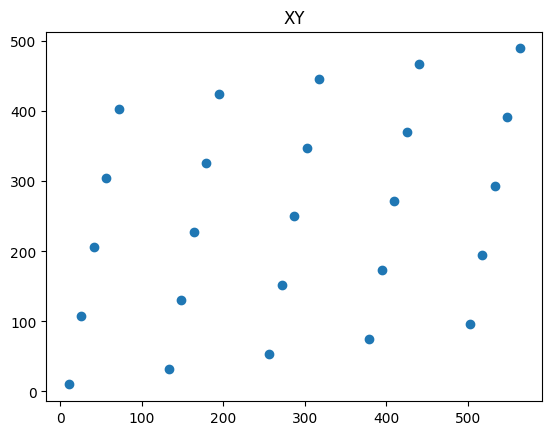

In [80]:
plt.scatter(cmm_deform[:, 0], cmm_deform[:,1])
plt.title("XY");

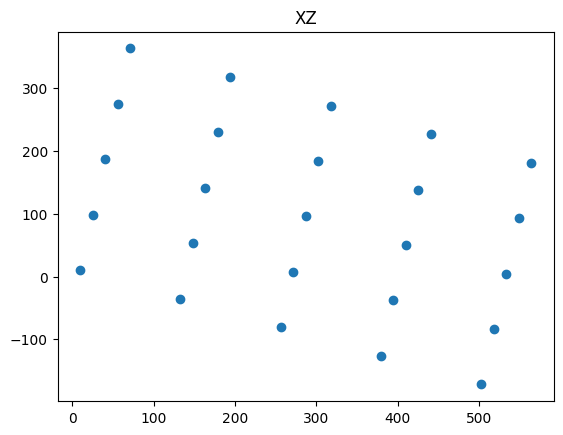

In [81]:
plt.scatter(cmm_deform[:, 0], cmm_deform[:,2])
plt.title("XZ");

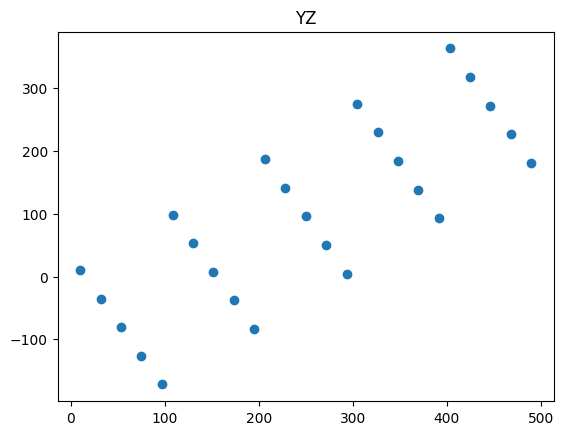

In [82]:
plt.scatter(cmm_deform[:, 1], cmm_deform[:,2])
plt.title("YZ");

In [83]:
# use numpy for inverse as I don't get correct inverse transforms with pg.Transform3D
deform1 = np.vstack((cmm_deform.T, np.ones((1, xyz.shape[1]))))
deform1

array([[  10.        ,  133.08039838,  256.16079676,  379.24119514,
         502.32159352,   25.34590916,  148.42630754,  271.50670592,
         394.58710431,  517.66750269,   40.69181833,  163.77221671,
         286.85261509,  409.93301347,  533.01341185,   56.03772749,
         179.11812587,  302.19852425,  425.27892263,  548.35932101,
          71.38363665,  194.46403503,  317.54443341,  440.6248318 ,
         563.70523018],
       [  10.        ,   31.70239612,   53.40479225,   75.10718837,
          96.8095845 ,  108.20189422,  129.90429035,  151.60668647,
         173.3090826 ,  195.01147872,  206.40378845,  228.10618457,
         249.8085807 ,  271.51097682,  293.21337295,  304.60568267,
         326.3080788 ,  348.01047492,  369.71287104,  391.41526717,
         402.80757689,  424.50997302,  446.21236914,  467.91476527,
         489.61716139],
       [  10.        ,  -35.48867652,  -80.97735304, -126.46602955,
        -171.95470607,   98.37357682,   52.8849003 ,    7.39622378,


In [88]:
# calculate matrix to transform to CSY 
# point ball 0
# z-plane through balls 0, 4, 20
# x-axis through balls 0, 4
xyz0 = deform1[:3, 0]
vx = deform1[:3, 4] - xyz0
vy = deform1[:3, 20] - xyz0

In [89]:
vx = vx/np.linalg.norm(vx)
vy = vy/np.linalg.norm(vy)
vz = np.cross (vx, vy)
vz = vz/np.linalg.norm(vz)


In [90]:
RP = np.array([[vx[0], vy[0], vz[0], xyz0[0]],
               [vx[1], vy[1], vz[1], xyz0[1]],
               [vx[2], vy[2], vz[2], xyz0[2]],
               [ 0.,0.,0., 1.]
])

In [91]:
inv_RP = np.linalg.inv(RP)

In [92]:
plate = inv_RP @ deform1

In [93]:
plate[:3, 0], plate[:3, 4], plate[:3, 20]

(array([0., 0., 0.]),
 array([ 5.31999972e+02, -3.01980663e-14, -3.64153152e-14]),
 array([ 2.84217094e-14,  5.31999970e+02, -6.35047570e-14]))

In [94]:
plate[2, :].max(), plate[2, :].min()

(0.0, -9.459100169806334e-14)